In [28]:
import shap
import pickle
import pandas as pd

In [29]:
with open("S01_shap_calc.pkl", "rb") as f:
    data = pickle.load(f)
    shaps = data["shaps"]
    infos = data["infos"]

In [30]:
pd.DataFrame.from_dict(infos)

,model,model_params,test_size,random_state
0,DTR,"{'criterion': 'friedman_mse', 'splitter': 'bes...",0.3,1
1,EN,"{'alpha': 0.06036600023843763, 'l1_ratio': 0.5...",0.3,5
2,GBR,"{'n_estimators': 78, 'learning_rate': 0.050261...",0.3,5
3,KNR,"{'n_neighbors': 30, 'weights': 'distance', 'al...",0.3,4
4,RFR,"{'n_estimators': 189, 'max_depth': 12, 'min_sa...",0.3,5
5,SVR,"{'kernel': 'poly', 'C': 0.020025747803671577, ...",0.3,5
6,XGBR,"{'n_estimators': 162, 'max_depth': 9, 'learnin...",0.3,5


In [31]:
idx = 6
shap_values = shaps[idx]["shap_values"]
model = shaps[idx]["model"]

print(f"Model: {model}")

Model: XGBR


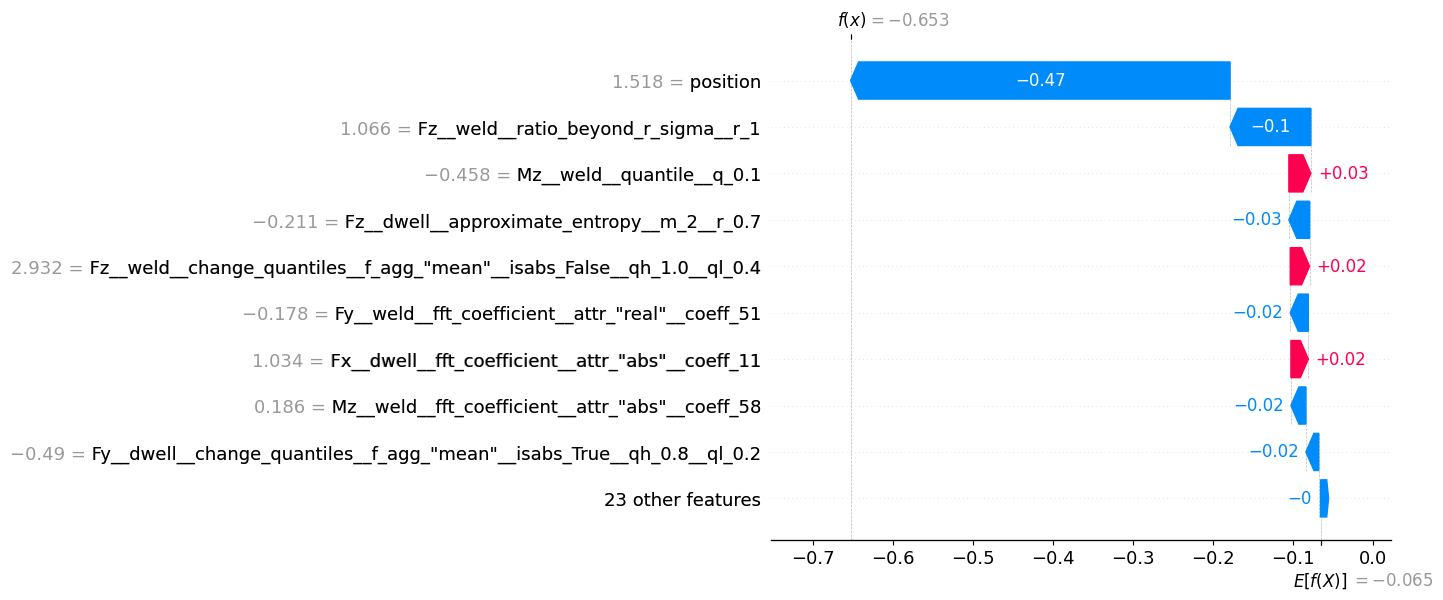

In [32]:
# Plot SHAP values for the first instance
shap.plots.waterfall(shap_values[0])

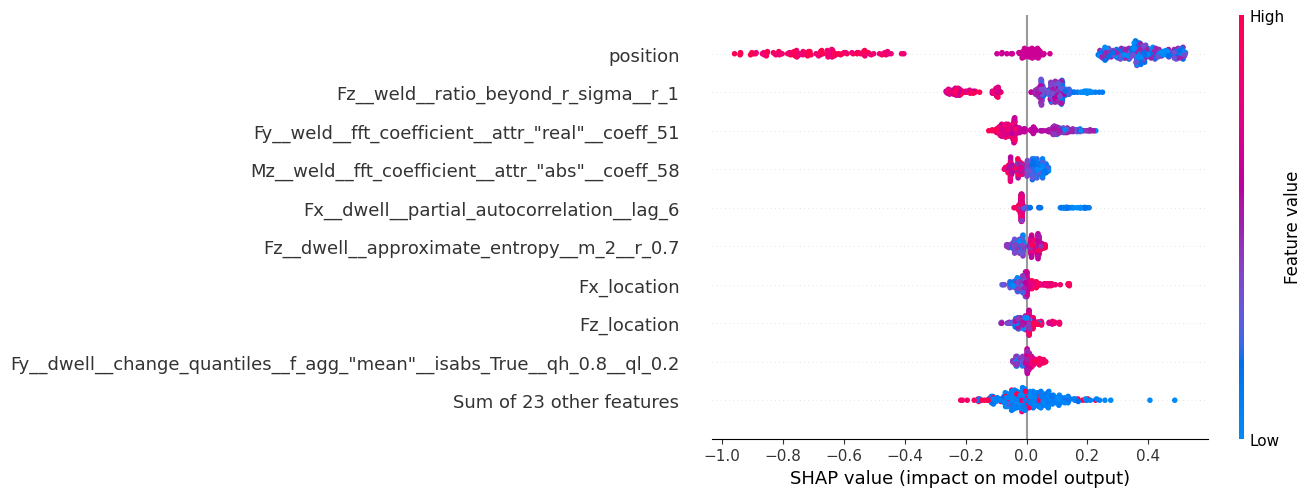

In [33]:
# Plot SHAP summary plot
shap.plots.beeswarm(shap_values)

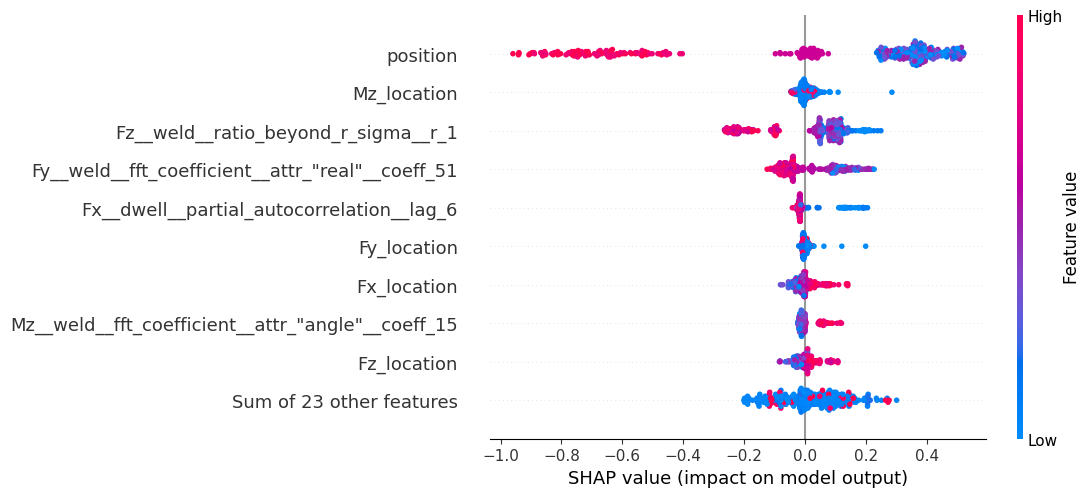

In [34]:
# Plot SHAP summary plot with features ordered by importance
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

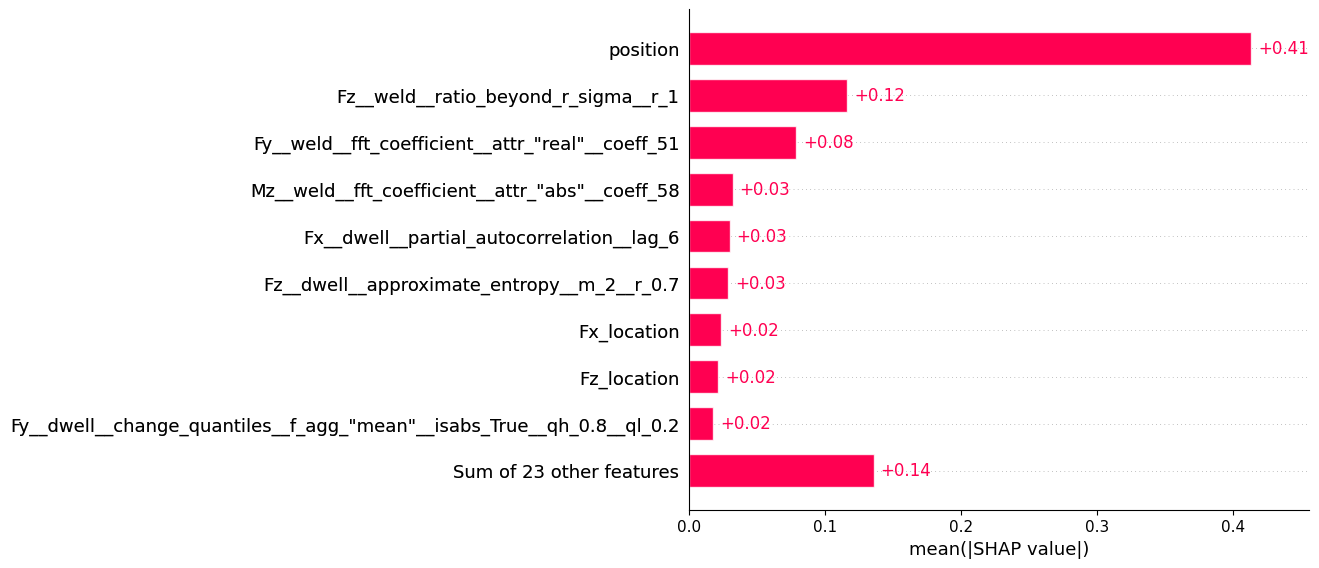

In [35]:
# Plot SHAP bar plot
shap.plots.bar(shap_values)

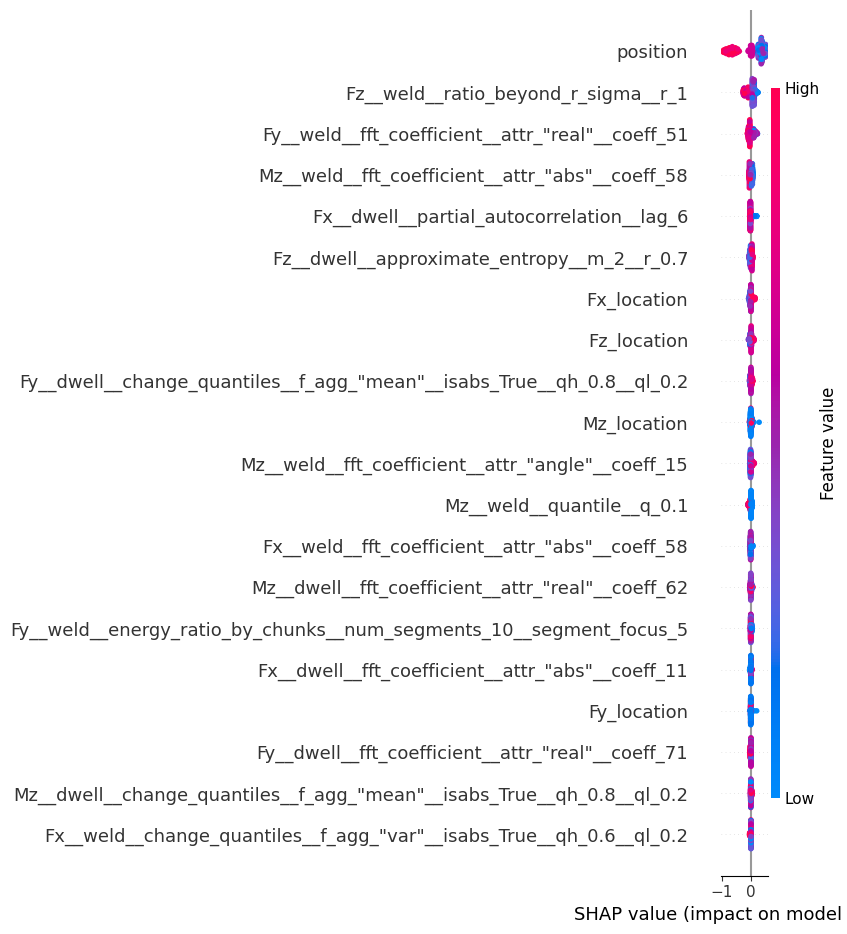

In [36]:
# Plot SHAP summary plot with feature names
shap.summary_plot(shap_values)

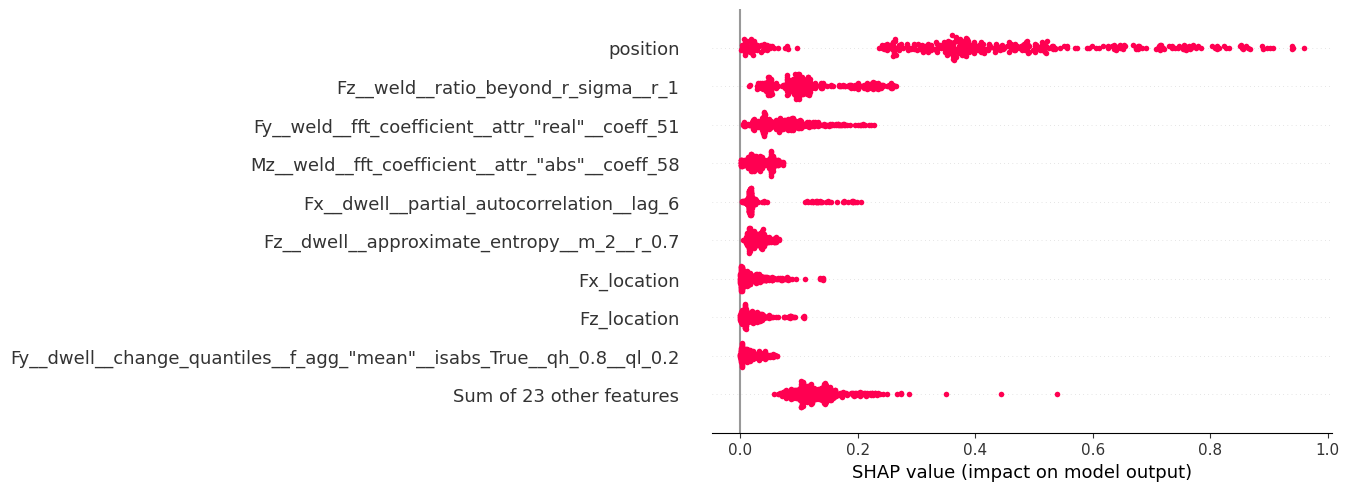

In [37]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

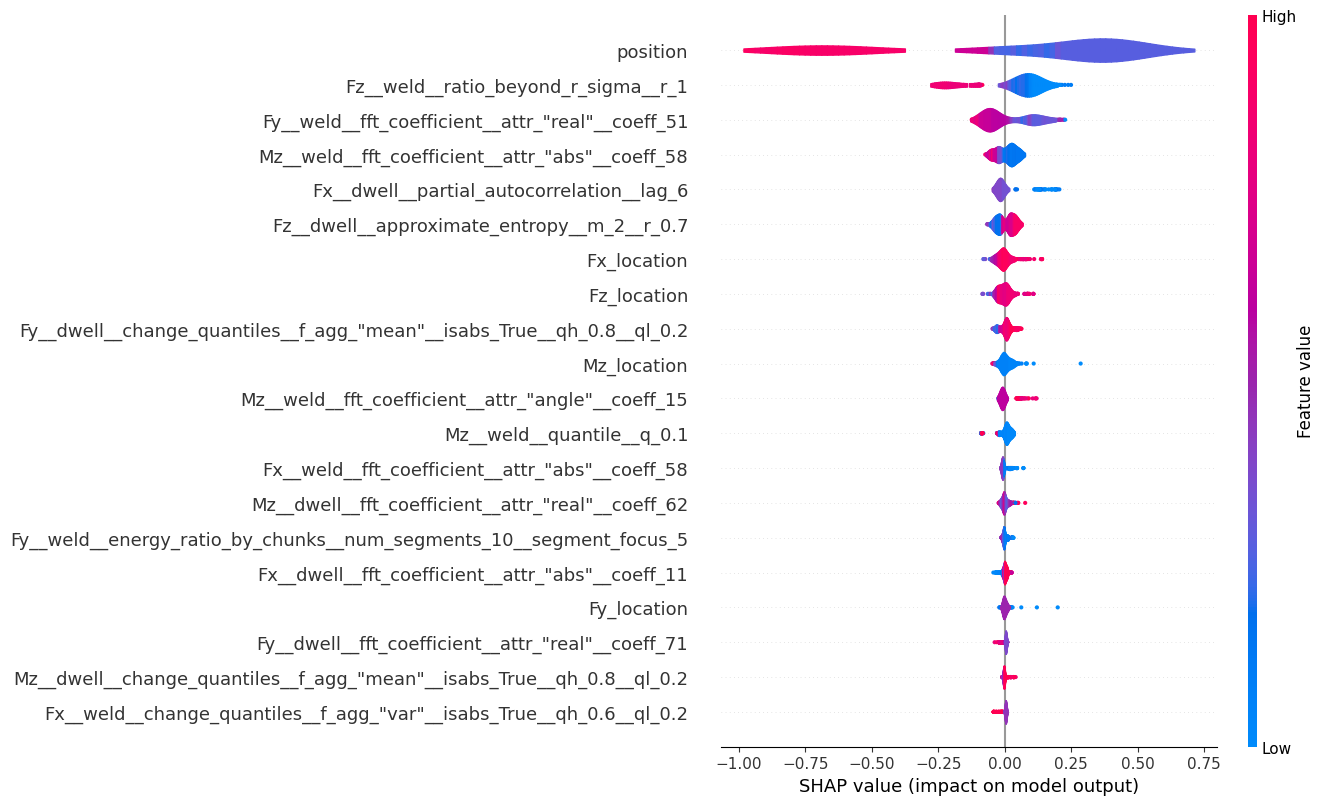

In [38]:
shap.plots.violin(shap_values)

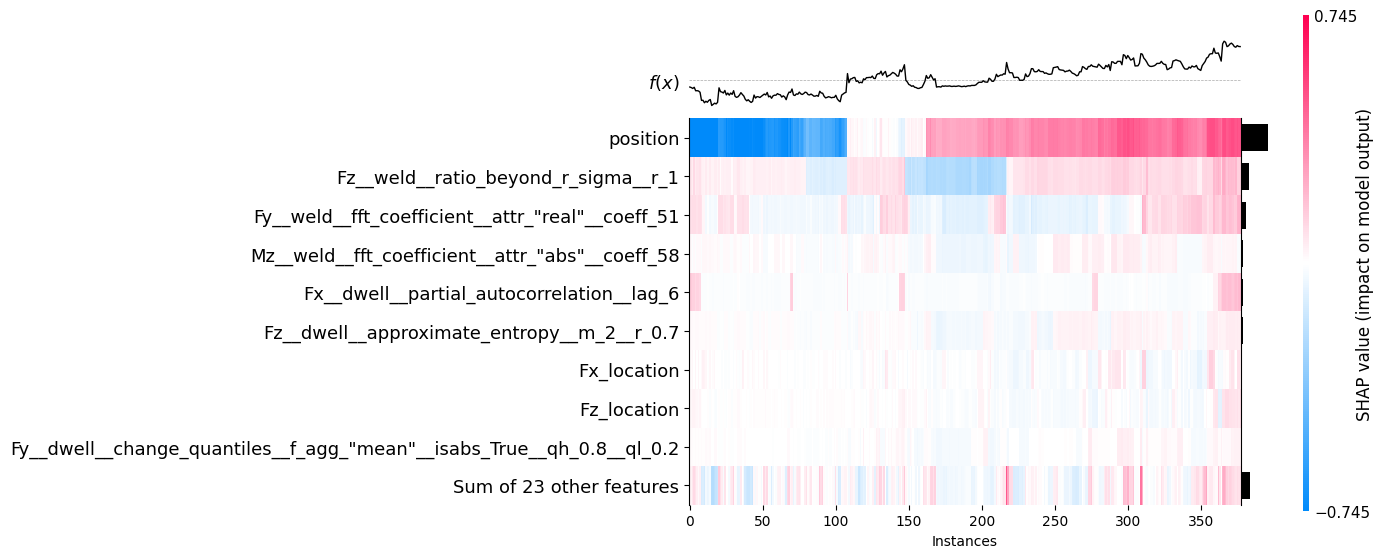

<Axes: xlabel='Instances'>

In [39]:
shap.plots.heatmap(shap_values)

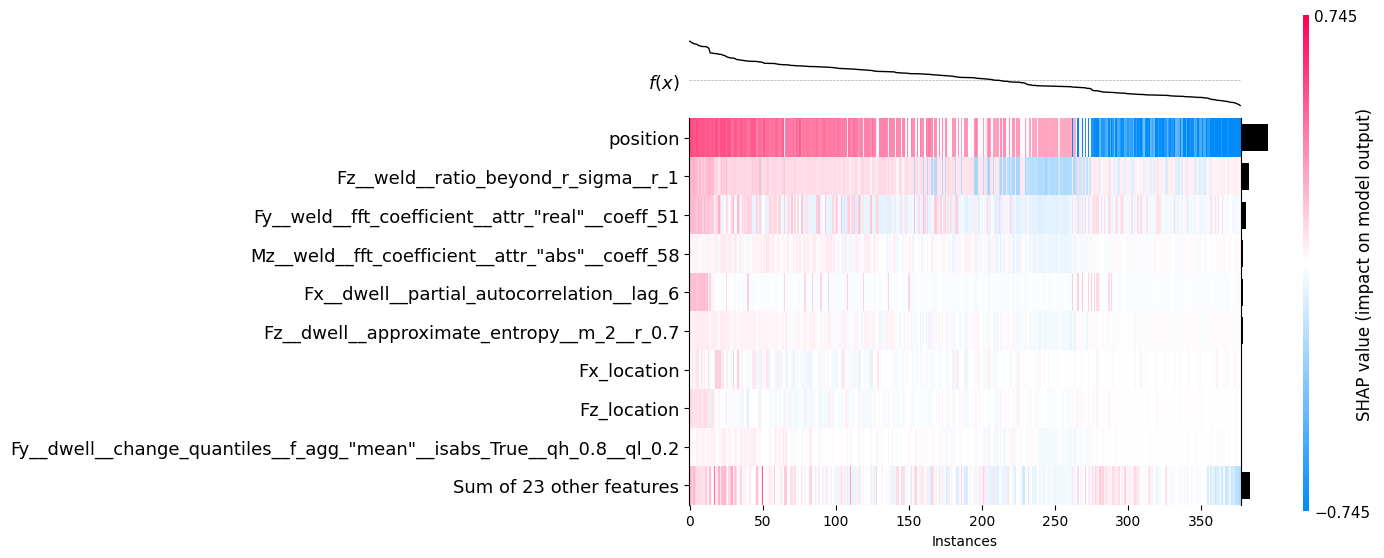

<Axes: xlabel='Instances'>

In [40]:
shap.plots.heatmap(shap_values, instance_order=shap_values.sum(1))

In [41]:
import numpy as np

feature_names = shap_values.feature_names
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)
vals = np.abs(shap_df.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name', 'feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
shap_importance

,col_name,feature_importance_vals
0,position,0.413725
28,Fz__weld__ratio_beyond_r_sigma__r_1,0.116406
25,"Fy__weld__fft_coefficient__attr_""real""__coeff_51",0.078855
31,"Mz__weld__fft_coefficient__attr_""abs""__coeff_58",0.032139
10,Fx__dwell__partial_autocorrelation__lag_6,0.029860
16,Fz__dwell__approximate_entropy__m_2__r_0.7,0.028871
4,Fx_location,0.023738
6,Fz_location,0.021456
13,"Fy__dwell__change_quantiles__f_agg_""mean""__isa...",0.017764
7,Mz_location,0.017198


In [42]:
ranking = shap_importance.rename(columns={"col_name": "feature", "feature_importance_vals": "value"})
ranking["measure"] = "SHAP_importance"
ranking["rank"] = np.arange(1, len(ranking) + 1)
ranking

,feature,value,measure,rank
0,position,0.413725,SHAP_importance,1
28,Fz__weld__ratio_beyond_r_sigma__r_1,0.116406,SHAP_importance,2
25,"Fy__weld__fft_coefficient__attr_""real""__coeff_51",0.078855,SHAP_importance,3
31,"Mz__weld__fft_coefficient__attr_""abs""__coeff_58",0.032139,SHAP_importance,4
10,Fx__dwell__partial_autocorrelation__lag_6,0.029860,SHAP_importance,5
16,Fz__dwell__approximate_entropy__m_2__r_0.7,0.028871,SHAP_importance,6
4,Fx_location,0.023738,SHAP_importance,7
6,Fz_location,0.021456,SHAP_importance,8
13,"Fy__dwell__change_quantiles__f_agg_""mean""__isa...",0.017764,SHAP_importance,9
7,Mz_location,0.017198,SHAP_importance,10


In [43]:
ranking.to_excel("S02.xlsx", index=False)